# Project 1: Data Analytics of PIMA Indians' Diabetes Dataset 

# Data Import and Description

In [1]:
# show plots inside the notebook  
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Loading
dataset1 = pd.read_csv('diabetes.csv')

In [3]:
# Checking Data set Shape
dataset1.shape

(768, 9)

In [4]:
# We see that we have 768 rows and 9 columns

In [5]:
# To see the first 5 rows of the dataset
dataset1.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# To see the last 5 rows of the dataset
dataset1.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
# To find the 5-number summary of the dataset
dataset1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# To see the distribution of the outcome
dataset1.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

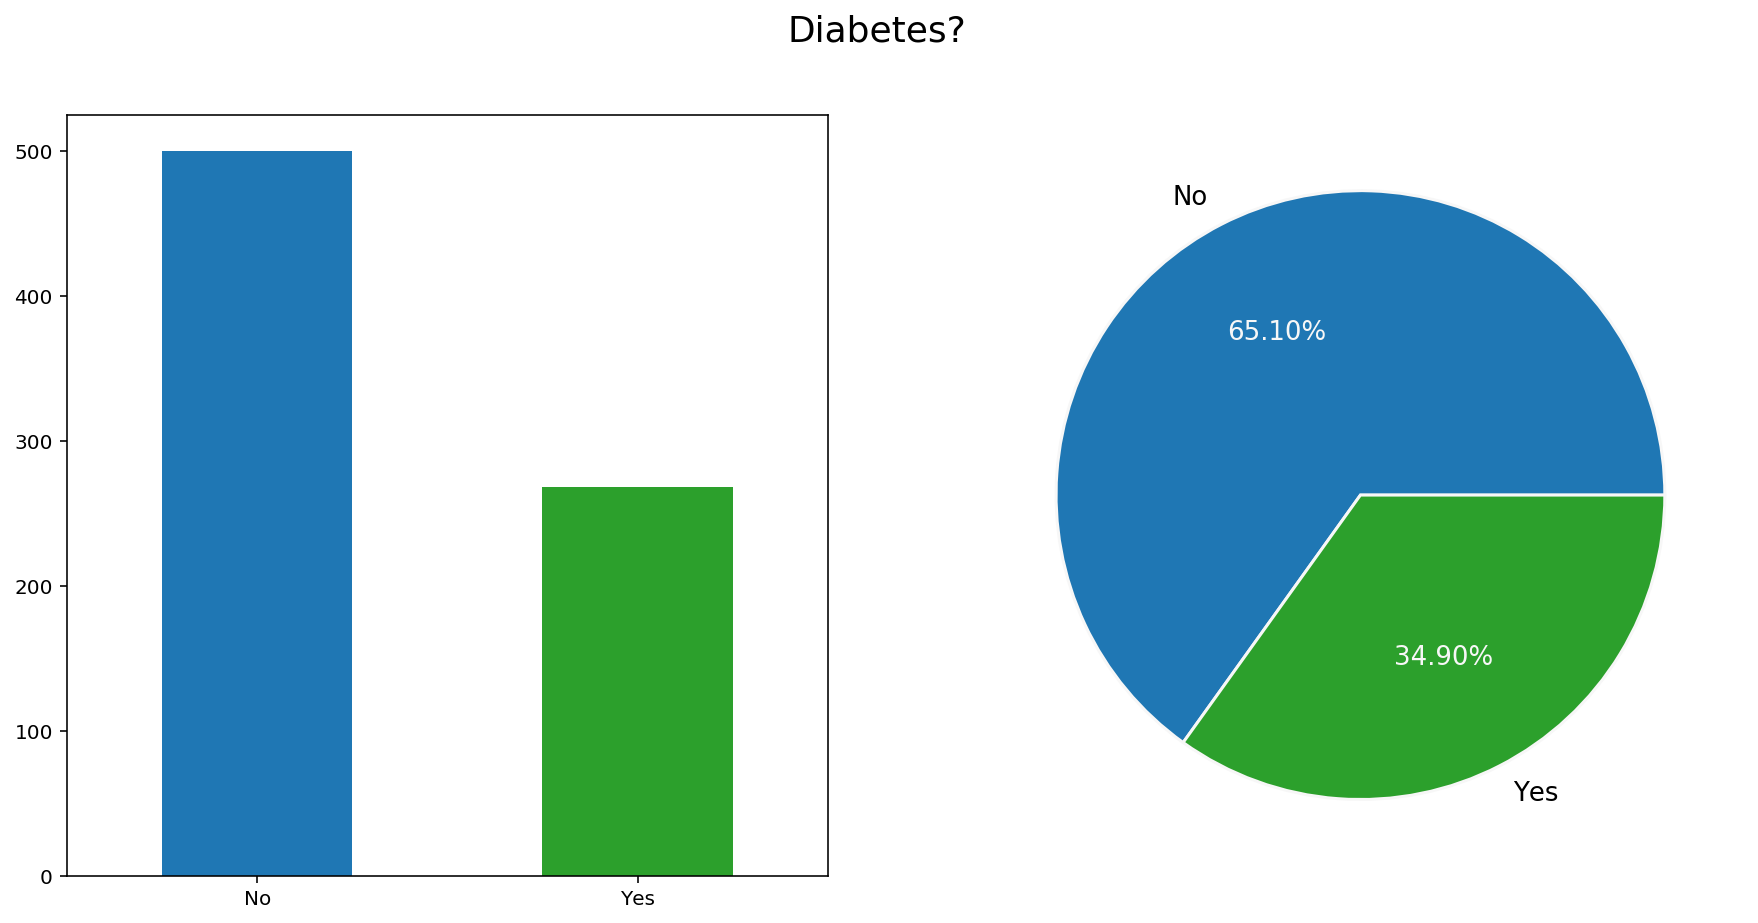

In [9]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = dataset1.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = dataset1.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

# Data Cleaning

### There some datas in the dataset which, physically and medically, cannot be zero. 

In [10]:
# To see the number of zero values under each cooumn
(dataset1==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### We know from medical science that it is impossible to have values of Glucose, BloodPressure, Skinthickness, Insulin and BMI to be zero (0). Especially the values of Skinthickness and Insulin have a lot of zero values 

In [11]:
# Create new dataset with values of original
dataset2 = dataset1.copy()

In [12]:
# To check if dataset2 has same zeros of concerned columns as dataset1
(dataset2.iloc[:,1:6]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [13]:
# Replacing all 0 values with NaN values (from Numpy library)
dataset2.iloc[:,1:6]=dataset2.iloc[:,1:6].replace(0,np.nan)

In [14]:
# To check number of zeros in  concerned columns
(dataset2.iloc[:,1:6]==0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [15]:
# To check number of NaN values in concerned columns
(dataset2.iloc[:,1:6].isnull()).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [16]:
# Creating a new dataset with original dataset's values so that we can drop zero values and use the mean value to impute into dataset2
dataset3=dataset1.copy()

In [17]:
# Replacing zero values of dataset 3 with NaN
dataset3.iloc[:,1:6]=dataset3.iloc[:,1:6].replace(0,np.nan)

In [18]:
# Dropping NaN values
dataset3.dropna(inplace=True)

In [19]:
# Finding new shape of dataset3 with dropped values
dataset3.shape

(392, 9)

In [20]:
# Replacing all NaN values in dataset2 with the corresponding columns mean values from dataset3 (smaller dataset with dropped NaN Values)
dataset2.iloc[:,1:6] = dataset2.iloc[:,1:6].fillna(dataset3.mean())

In [21]:
dataset1.shape

(768, 9)

In [22]:
dataset2.shape

(768, 9)

In [23]:
dataset3.shape

(392, 9)

In [24]:
dataset1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
dataset2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.692888,72.325800,29.151052,155.795560,32.466469,0.471876,33.240885,0.348958
std,3.369578,30.436043,12.101807,8.790943,85.021487,6.875558,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.145408,156.056122,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.056122,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
dataset3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### We now have 3 datasets. dataset1 is the original, untouched dataset. dataset2 has imputed missing values from mean of dataset3. dataset3 has missing/NaN values dropped (dataset3 provides a better mean value to impute into dataset2 as it doesnt contain zero values)

### We will use dataset2 and continue with visualization 

# Data Visualization and Prediction

### We will now visualize the data in various ways

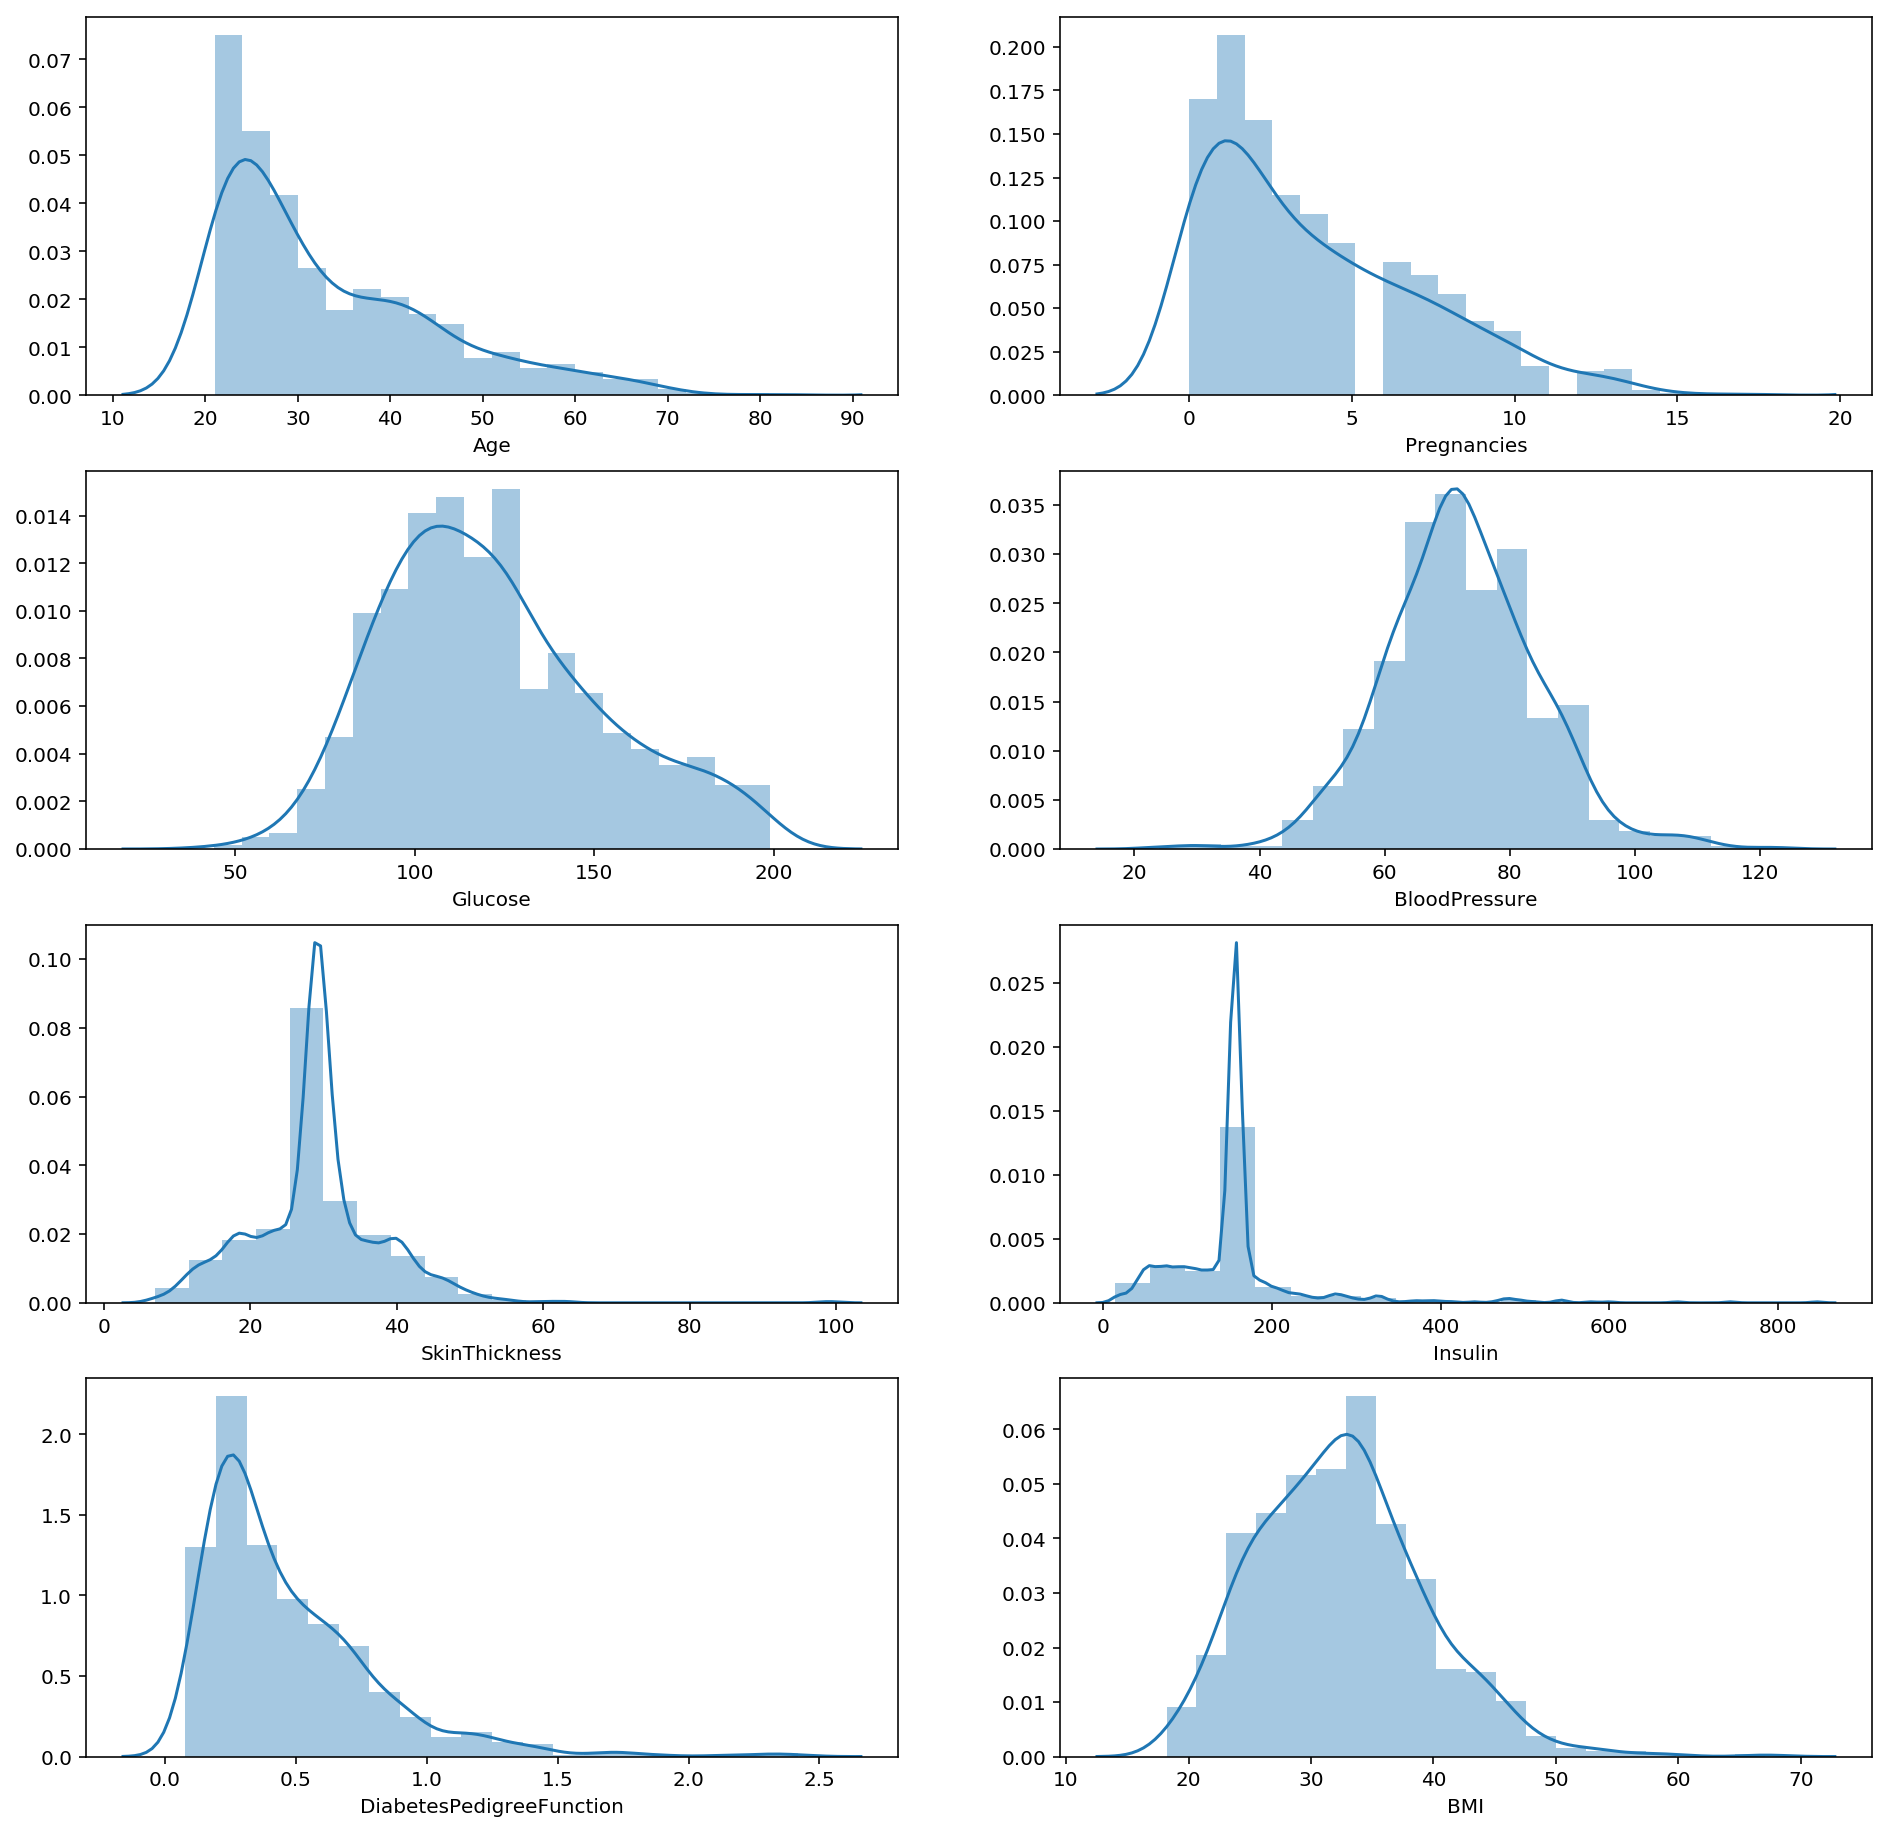

In [27]:
# Plotting a histogram; this tells us about the distribution of data in each independent variable over the values. 
# For example, we can see that there are lot of glucose values of >100,
# or we can see that most BM values are between 20 to 40
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(dataset2.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(dataset2.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(dataset2.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(dataset2.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(dataset2.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(dataset2.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(dataset2.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(dataset2.BMI, bins = 20, ax=ax[3,1]) 

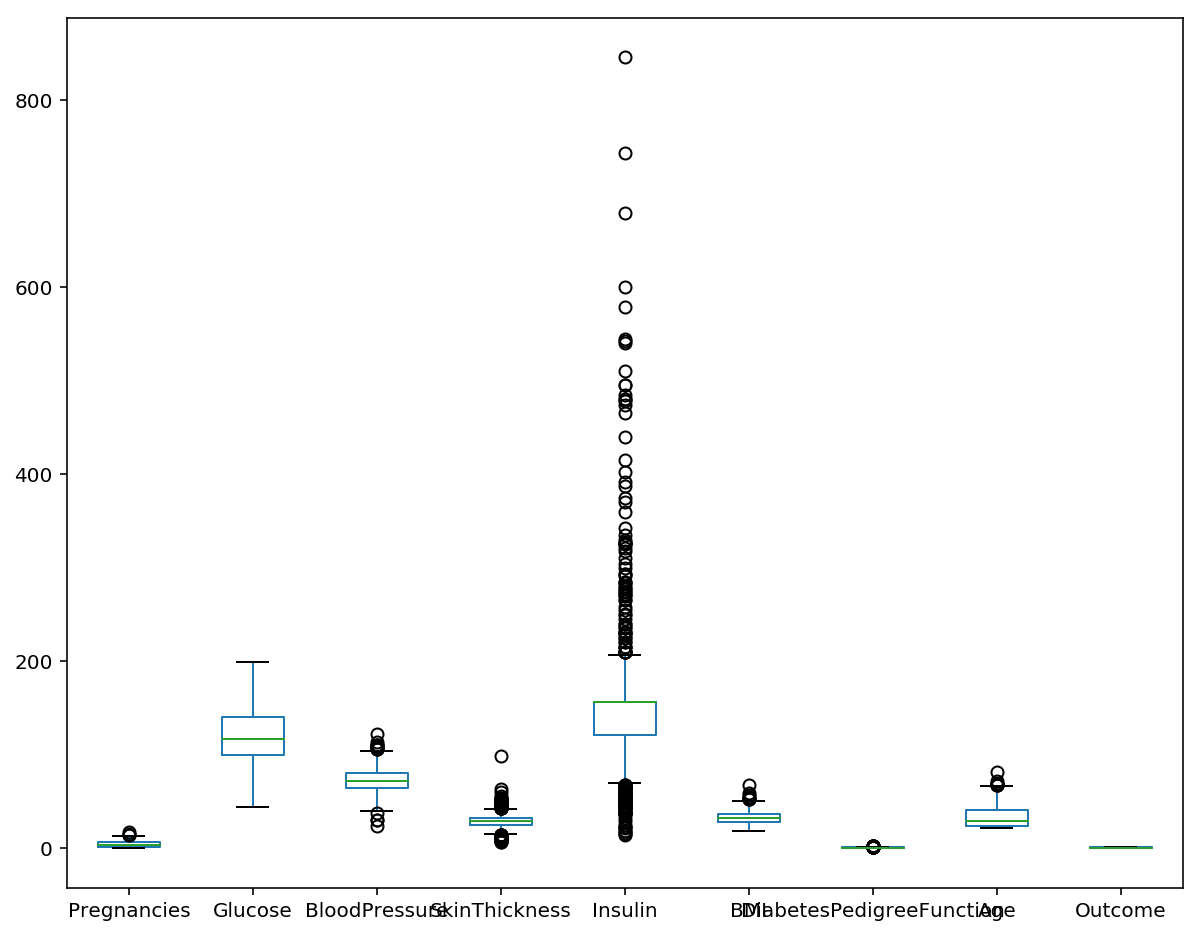

In [28]:
# We are now drawing a boxplot, which is a method for graphically depicting groups of numerical data through their quartiles
dataset2.plot(kind= 'box' ,layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [29]:
# In the above, the boxplot is not normalized and due to varied distribution of our dataset values over various ranges,
# we cannot visualize properly. hence, we are going to normalize it with the equation: (x-mean)/(max-min)
# we are putting the result into a new dataset called dataset2_norm with the normalized values
dataset2_norm = (dataset2 - dataset2.mean()) / (dataset2.max() - dataset2.min())

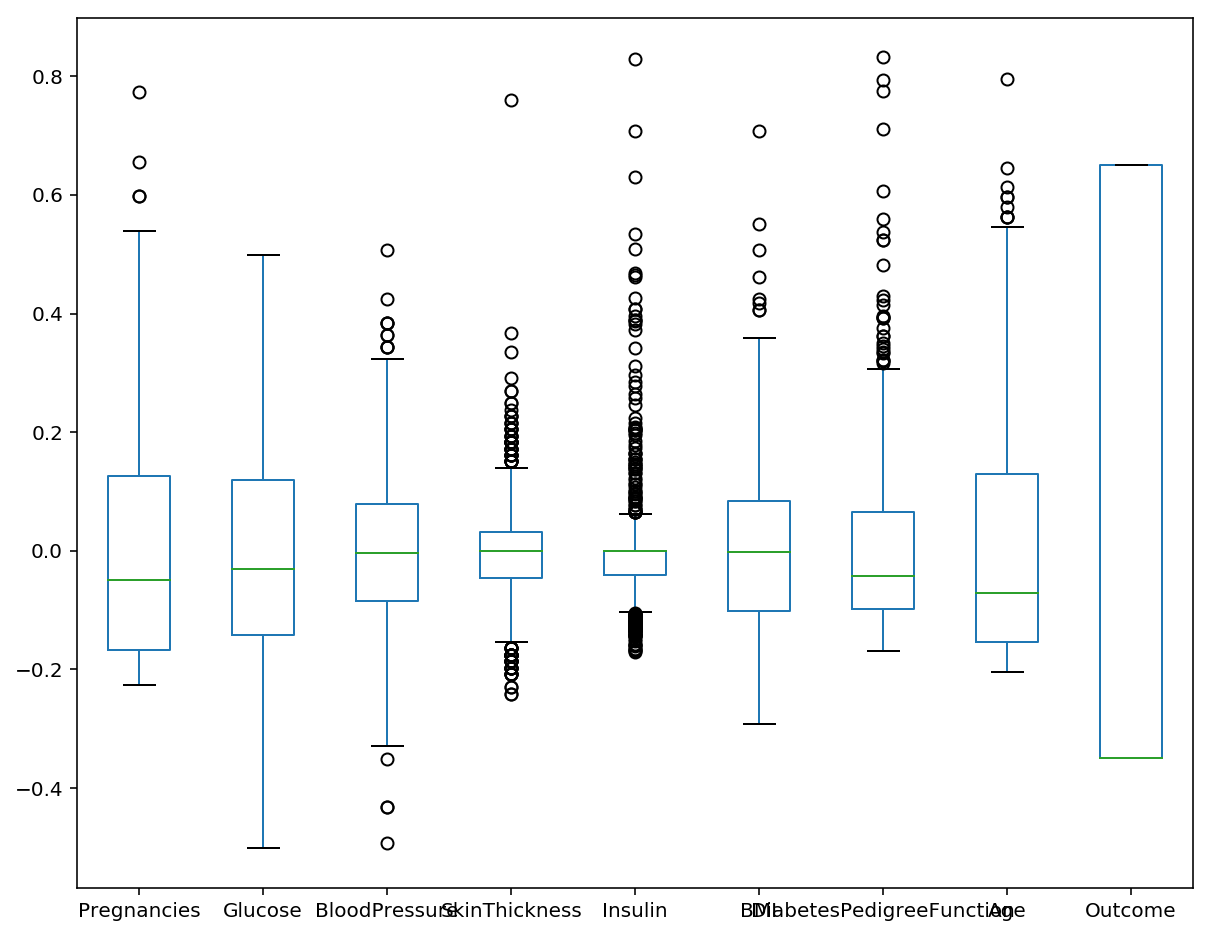

In [30]:
# Here we are plotting the box plot again with normalized values
dataset2_norm.plot(kind= 'box' , layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [31]:
# Describing the normalized dataset
dataset2_norm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,3.180326e-18,-4.698209e-18,-6.323654e-16,-6.228064e-16,1.590379e-16,6.004041e-16,2.690990e-16,4.007934e-17,-1.089985e-16
std,1.982105e-01,1.963616e-01,1.234878e-01,9.555372e-02,1.021893e-01,1.406045e-01,1.414725e-01,1.960039e-01,4.769514e-01
min,-2.261795e-01,-5.012444e-01,-4.931204e-01,-2.407723e-01,-1.704274e-01,-2.917478e-01,-1.681795e-01,-2.040148e-01,-3.489583e-01
25%,-1.673560e-01,-1.415670e-01,-8.495714e-02,-4.512013e-02,-4.122062e-02,-1.015638e-01,-9.740662e-02,-1.540148e-01,-3.489583e-01
50%,-4.970895e-02,-3.027669e-02,-3.324488e-03,-6.134205e-05,3.131765e-04,-1.359292e-03,-4.243224e-02,-7.068142e-02,-3.489583e-01
75%,1.267616e-01,1.197233e-01,7.830816e-02,3.096683e-02,3.131765e-04,8.453028e-02,6.591533e-02,1.293186e-01,6.510417e-01
max,7.738205e-01,4.987556e-01,5.068796e-01,7.592277e-01,8.295726e-01,7.082522e-01,8.318205e-01,7.959852e-01,6.510417e-01


In [32]:
# Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.
# It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

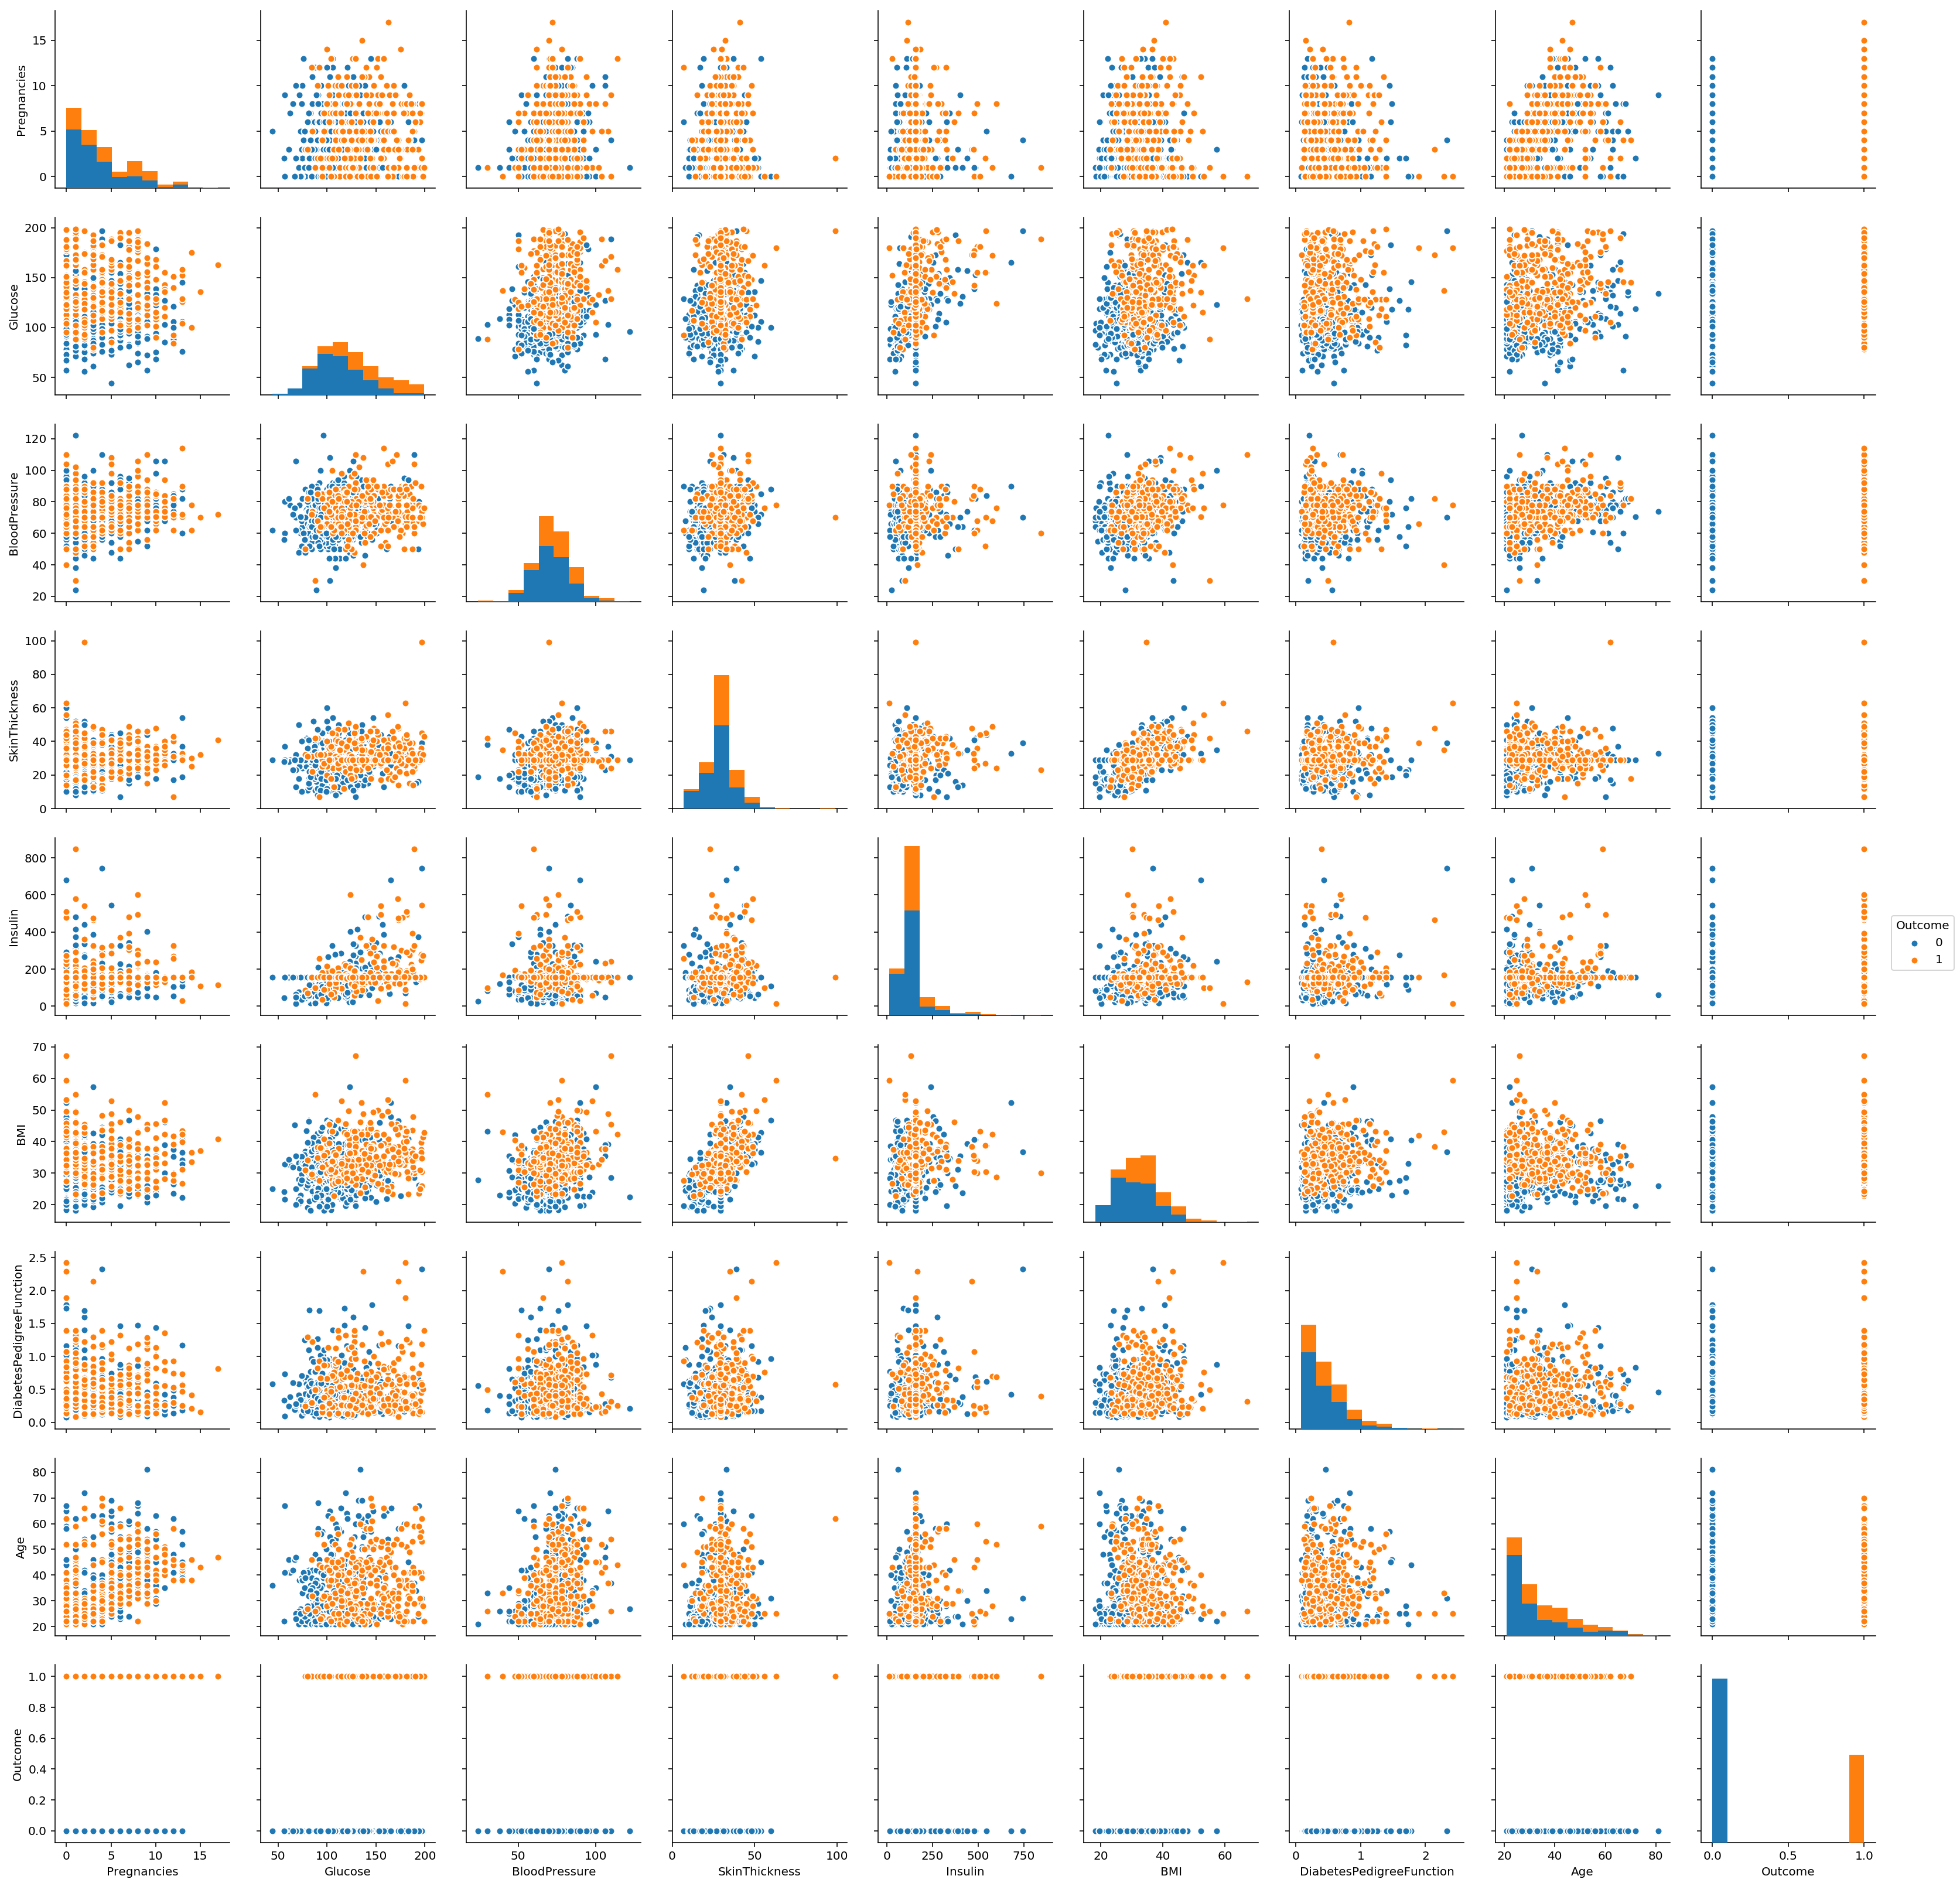

In [33]:
sns.pairplot(data=dataset2,hue='Outcome')

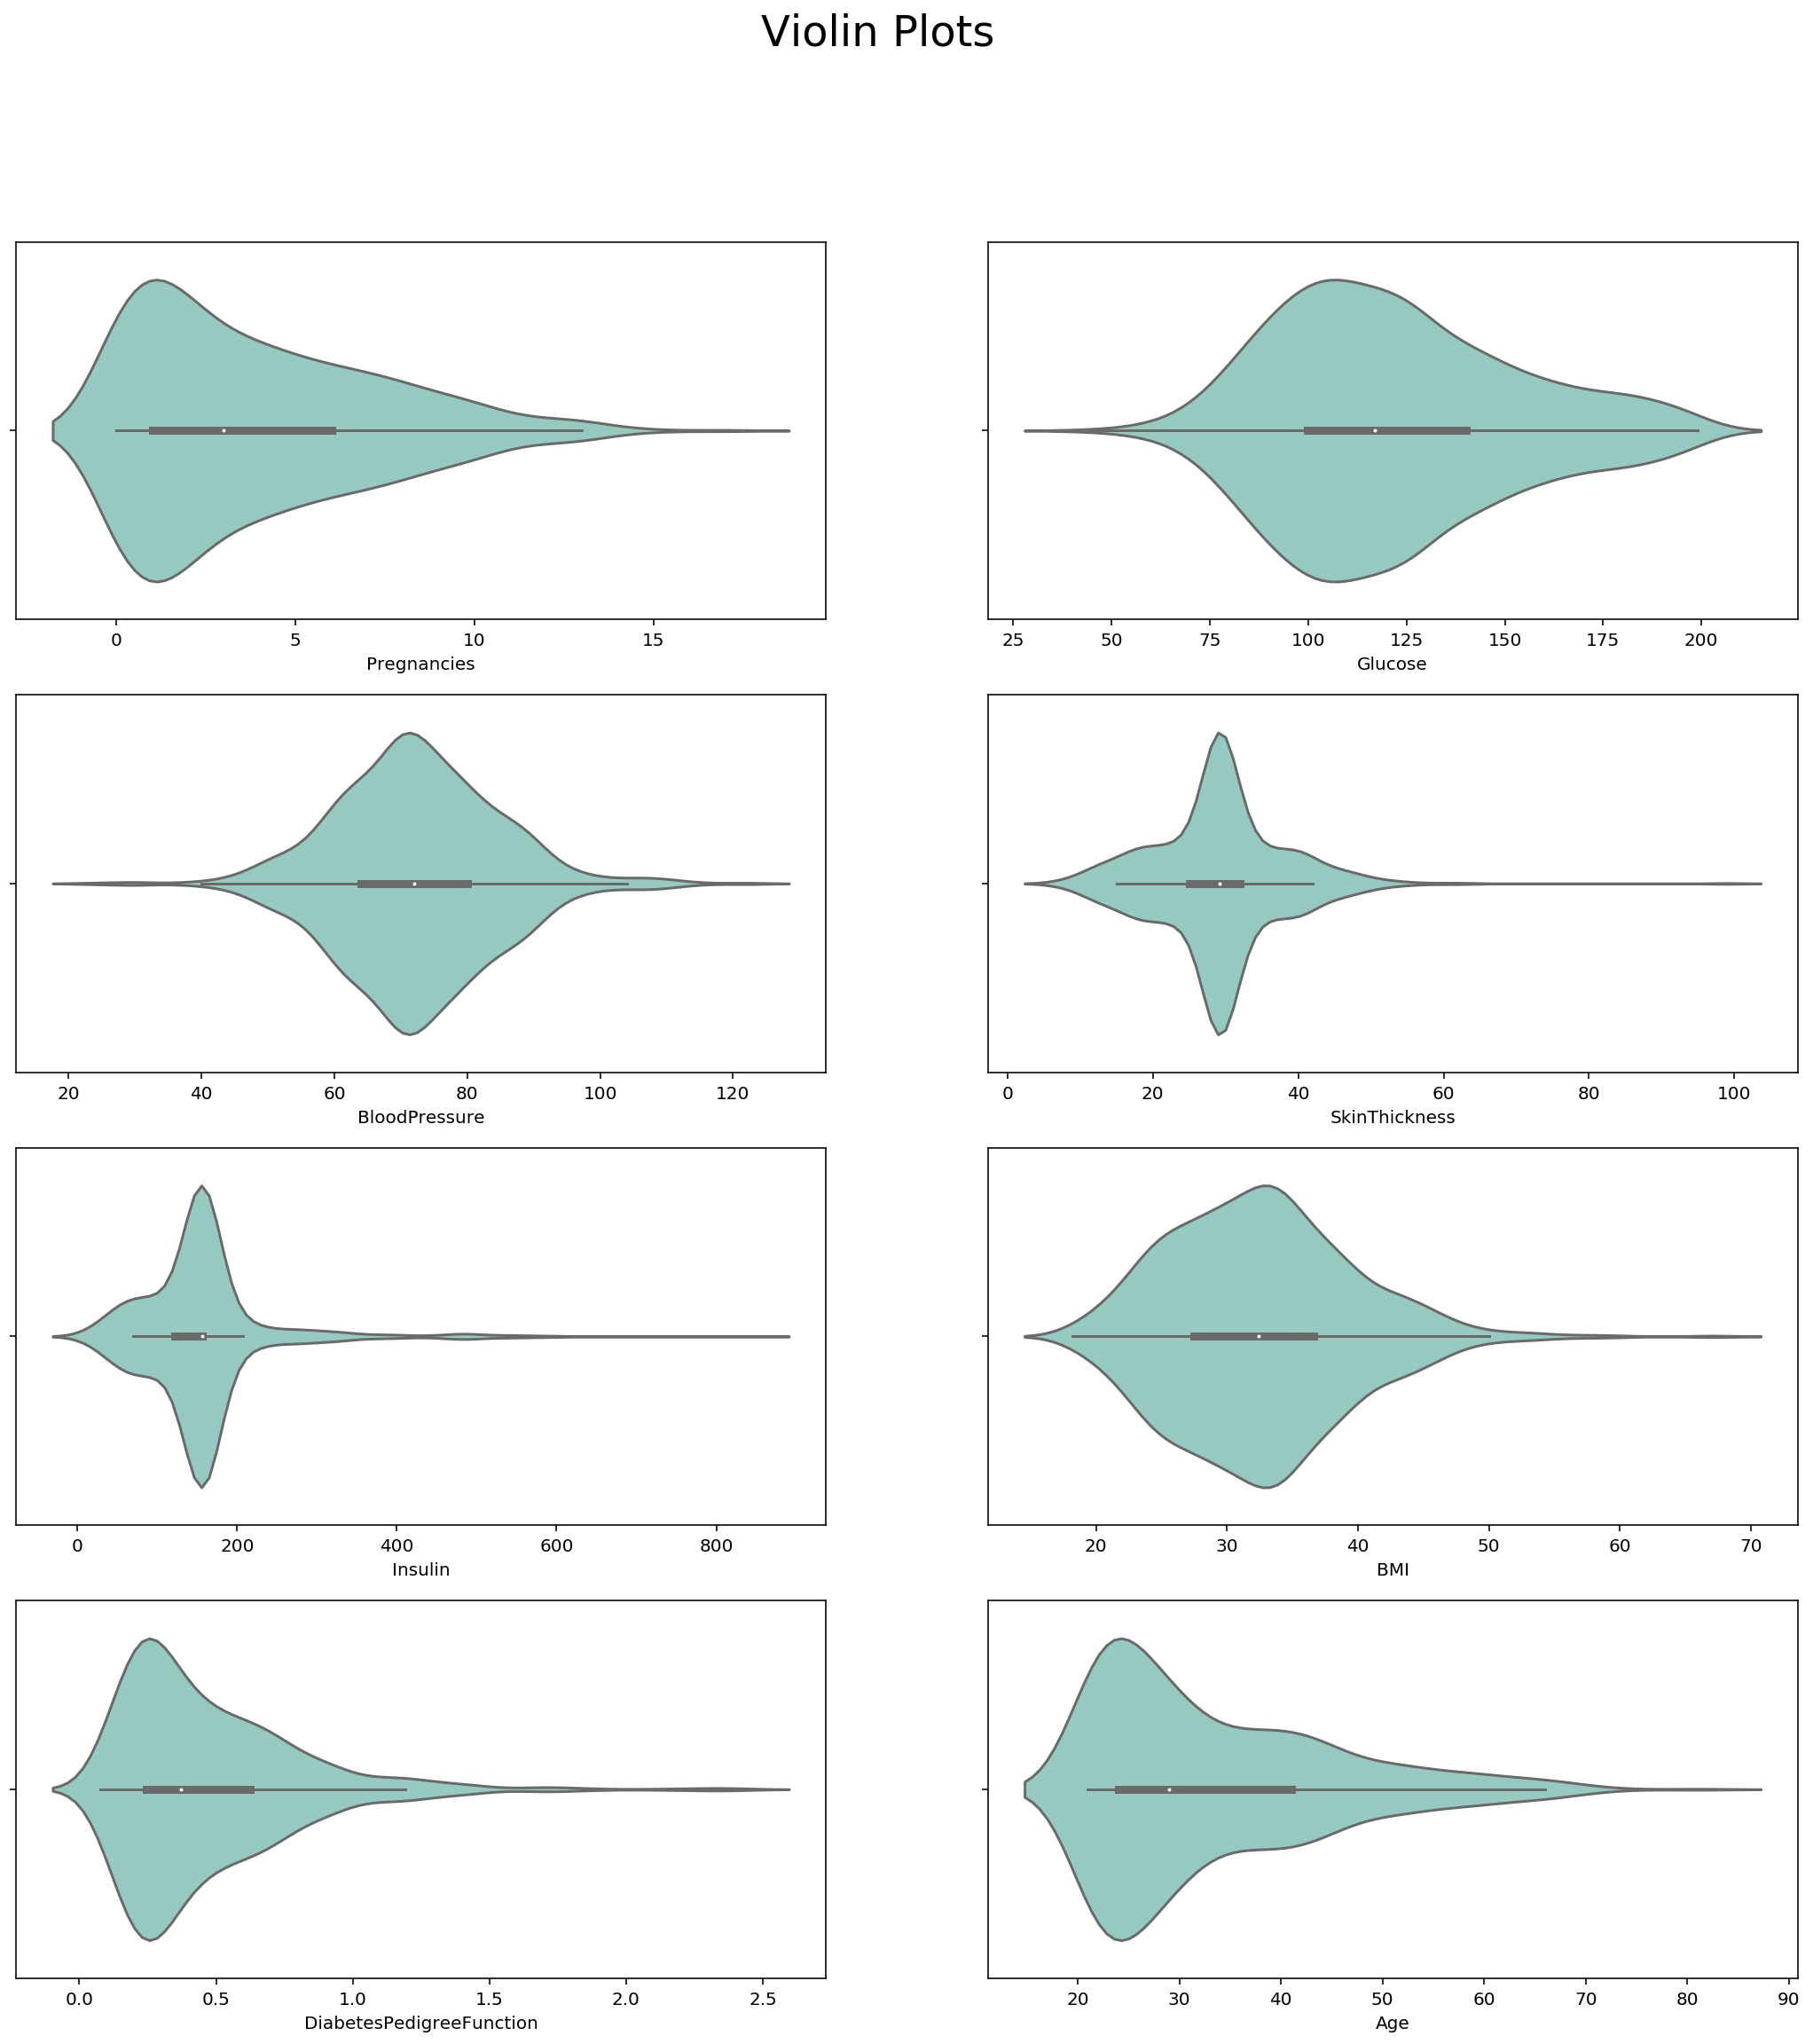

In [34]:
# A violin plot is a method of plotting numeric data. 
#It is similar to box plot with a rotated kernel density plot on each side. 
#Violin plots are similar to box plots, except that they also show the probability density of the data at different values 
# (in the simplest case this could be a histogram).
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="Pregnancies", data=dataset2,ax=ax[0,0],palette='Set3')
sns.violinplot(x="Glucose", data=dataset2,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='BloodPressure', data=dataset2, ax=ax[1,0], palette='Set3')
sns.violinplot(x='SkinThickness', data=dataset2, ax=ax[1,1],palette='Set3')
sns.violinplot(x='Insulin', data=dataset2, ax=ax[2,0], palette='Set3')
sns.violinplot(x='BMI', data=dataset2, ax=ax[2,1],palette='Set3')
sns.violinplot(x='DiabetesPedigreeFunction', data=dataset2, ax=ax[3,0],palette='Set3')
sns.violinplot(x='Age', data=dataset2, ax=ax[3,1],palette='Set3')
plt.show()

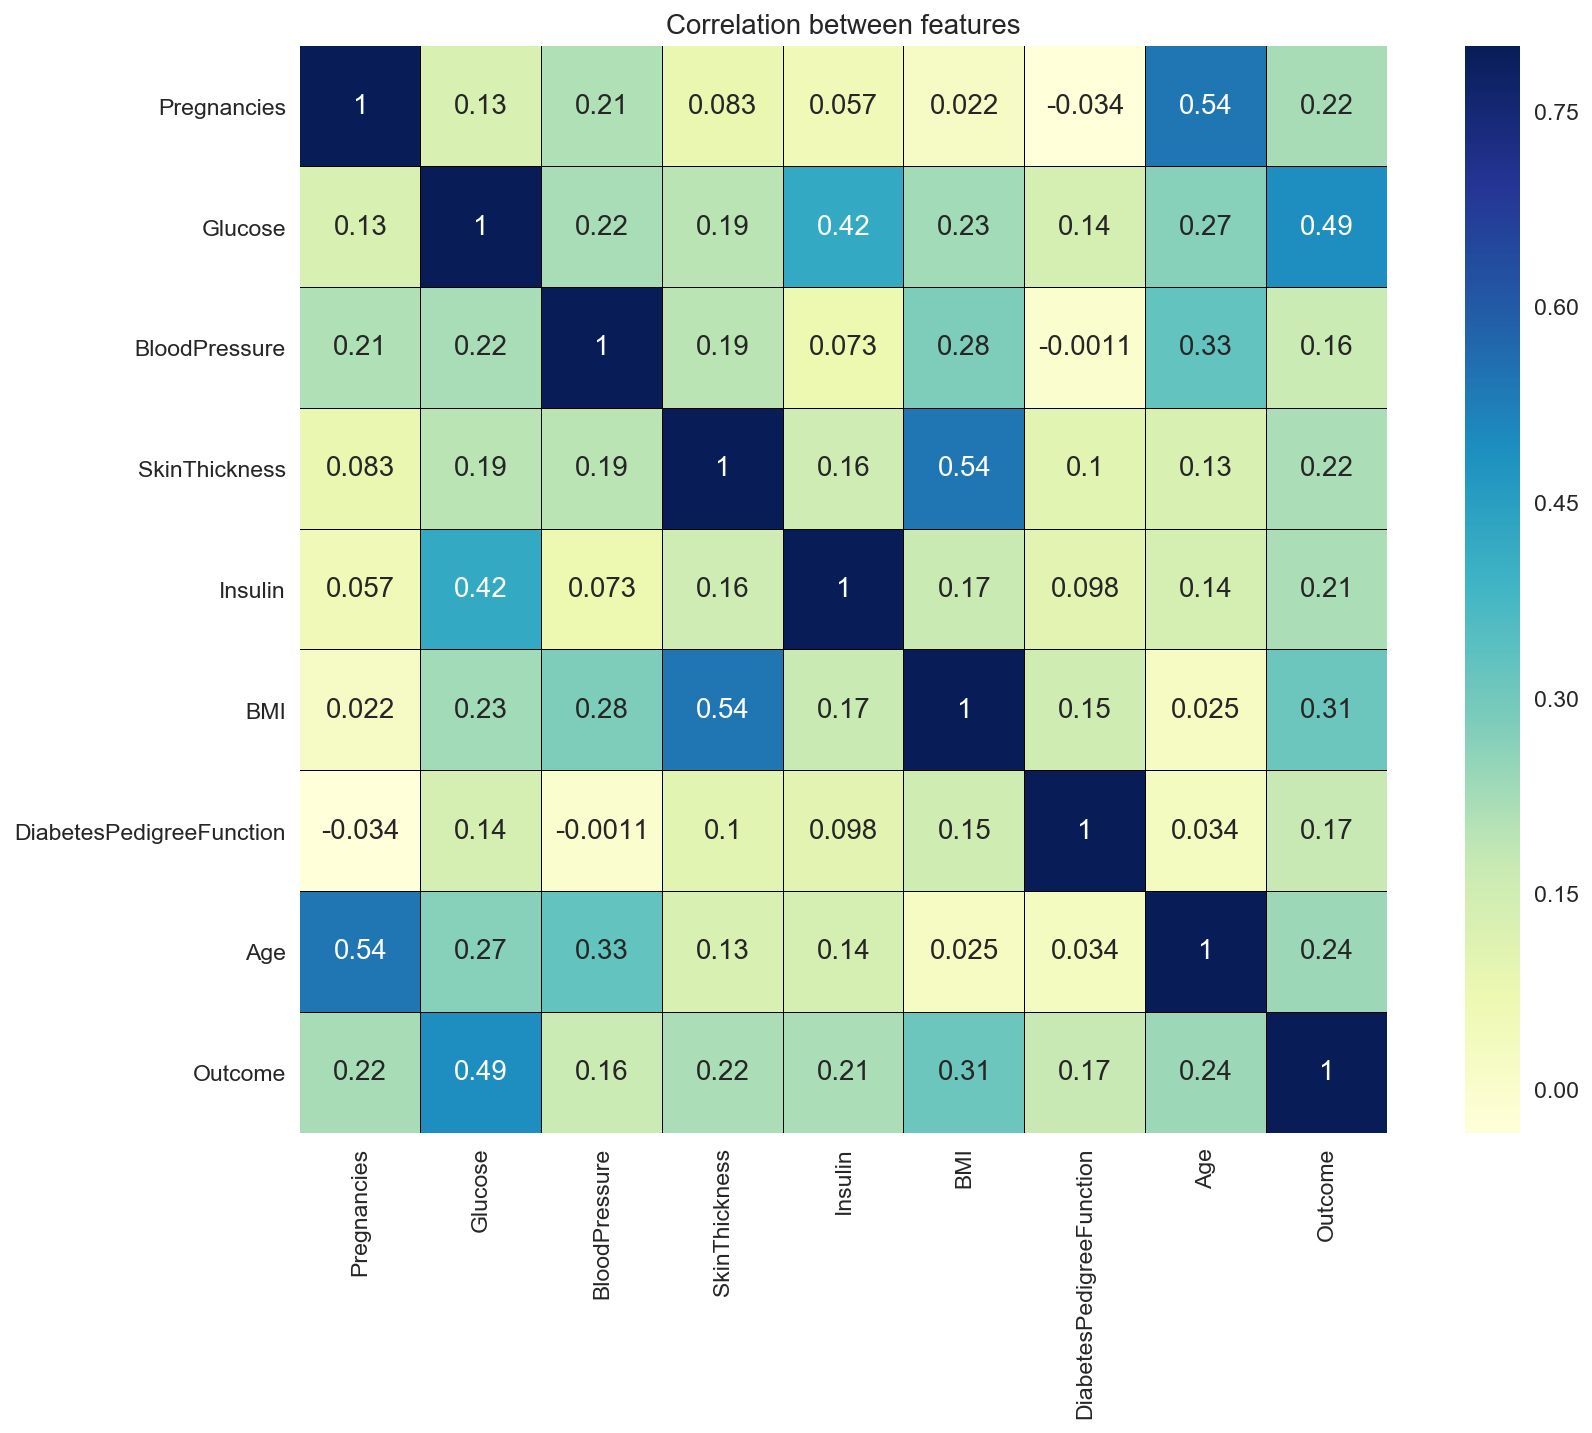

In [35]:
#Variables within a dataset can be related for lots of reasons.
# It can be useful in data analysis and modeling to better understand the relationships between variables.
# The statistical relationship between two variables is referred to as their correlation.
#A correlation could be positive, meaning both variables move in the same direction, or negative,
# meaning that when one variable’s value increases, the other variables’ values decrease.
# Correlation can also be neural or zero, meaning that the variables are unrelated.
corr=dataset2.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');